In [1]:
import rasterio
from rasterio import merge
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

In [2]:
from rasterhandler import RasterHandler,AreaType
from analyzer import Analyzer

In [3]:
_unburned_tiff_path = "./Satellite_burned_area_dataset_part1/EMSR213_01VESUVIO_02GRADING_MAP_v2_vector/sentinel2_2017-06-27.tiff"
_burned_tiff_path = "./Satellite_burned_area_dataset_part1/EMSR213_01VESUVIO_02GRADING_MAP_v2_vector/sentinel2_2017-07-17.tiff"

In [4]:
_raster_data=RasterHandler(_burned_tiff_path,_unburned_tiff_path)
_analyzer=Analyzer()

In [5]:
_raster_data.get_metadata(AreaType.BURNED)

  Metadata    Value                           Description
0   driver    GTiff            Driver used or data format
1    dtype  float32              Data type (e.g., uint16)
2   nodata     None  Definition of invalid (empty) values
3    width      894                 Image width in pixels
4   height      969                Image height in pixels


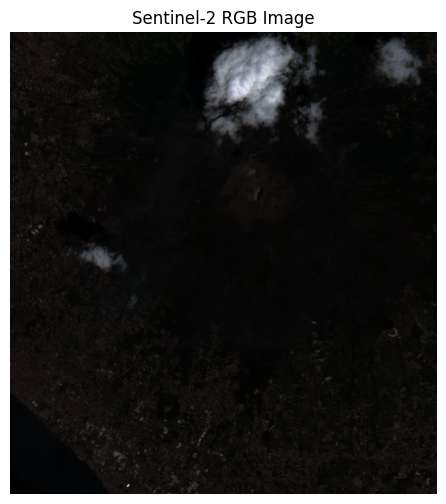

RGB image saved successfully: ./outputs/sentinel2_rgb.png


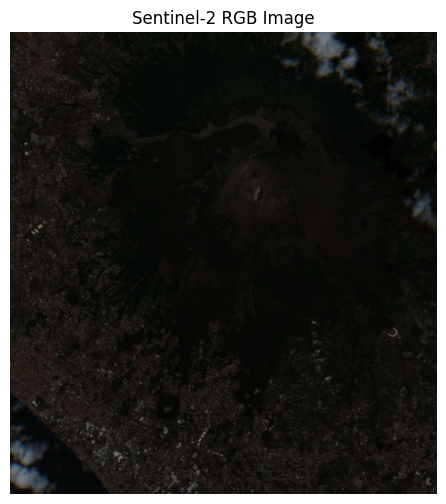

RGB image saved successfully: ./outputs/sentinel2_rgb.png


In [6]:
_raster_data.visualize_rgb(AreaType.BURNED)
_raster_data.visualize_rgb(AreaType.UNBURNED)

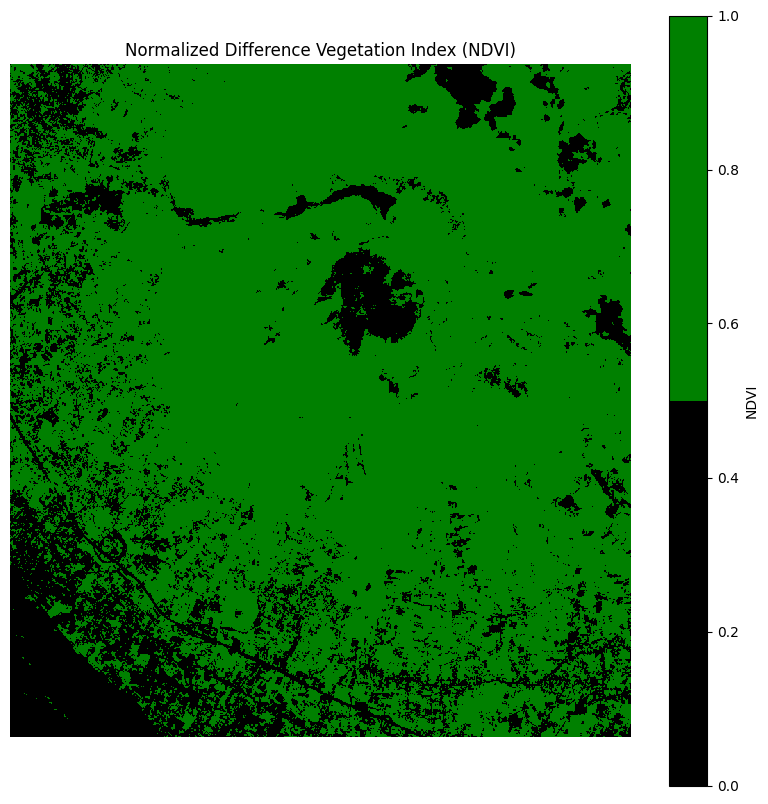

In [7]:
_unburned=_analyzer.visualize_ndvi_with_threshold(_raster_data.src(AreaType.UNBURNED),threshold=0.33,verbose=True)

In [8]:
_burned=_analyzer.visualize_ndvi_with_threshold(_raster_data.src(AreaType.BURNED),threshold=0.33,verbose=False)

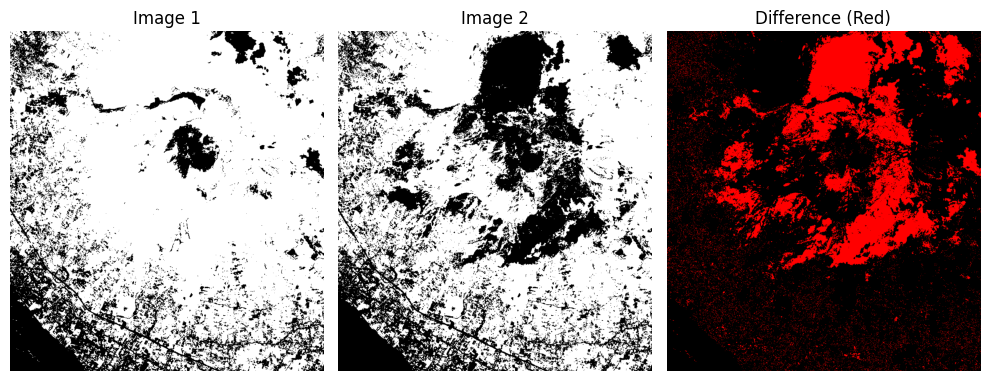

In [9]:
_analyzer.visualize_image_difference(_unburned, _burned)

In [10]:
dnbr = _analyzer.visualize_ndvi_with_threshold(_raster_data.src(AreaType.UNBURNED)) - _analyzer.visualize_ndvi_with_threshold(_raster_data.src(AreaType.BURNED))

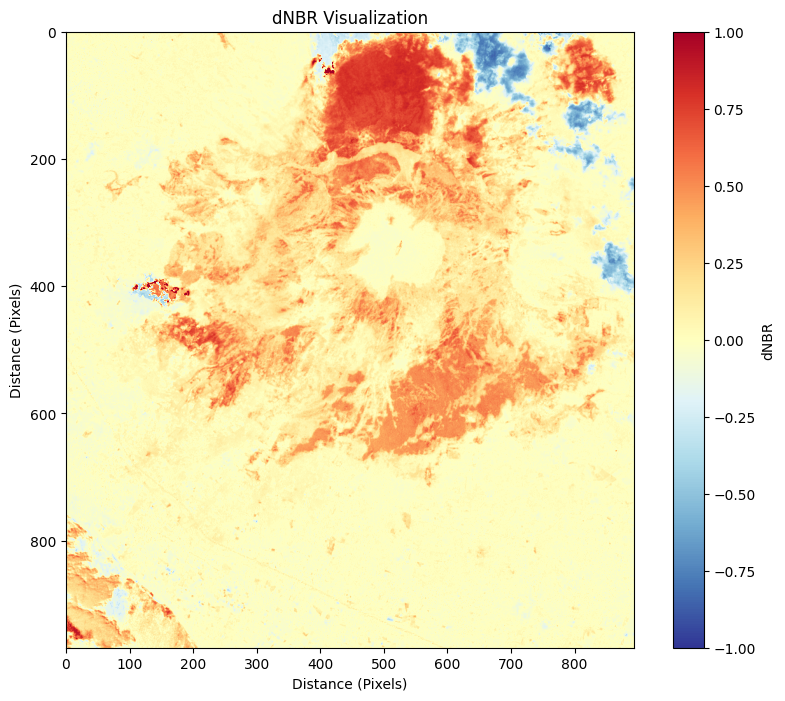

In [11]:
_analyzer.visualize_dnbr(dnbr)

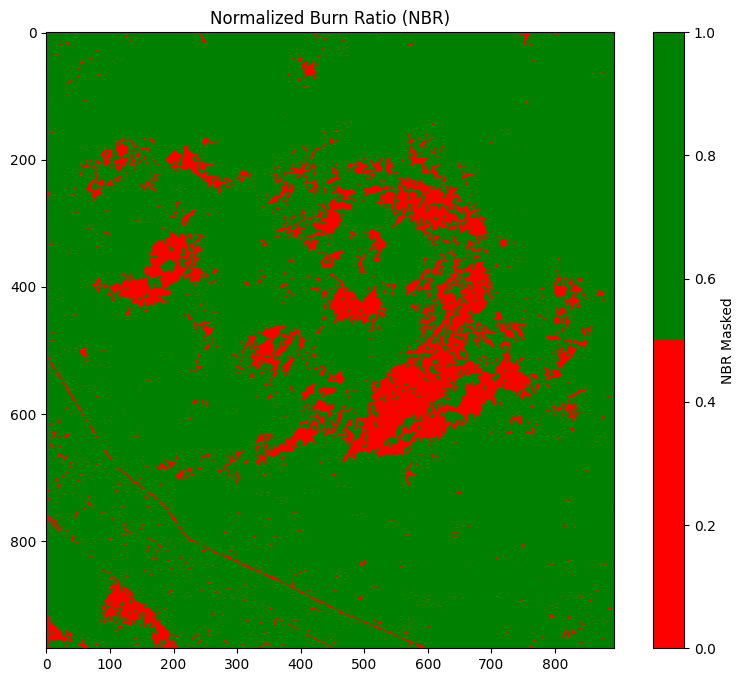

In [14]:
_analyzer.calculate_and_plot_nbr(_raster_data.src(AreaType.BURNED),-0.2)